In [4]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score,f1_score

# MODELS

In [5]:
X= pd.read_pickle('X.pkl')
y= pd.read_pickle('y.pkl')
X.to_excel('son.xlsx')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9693 entries, 0 to 9692
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   spray_day               9693 non-null   int64  
 1   Depart                  9693 non-null   float64
 2   Species_CULEX RESTUANS  9693 non-null   int32  
 3   Species_CULEX PIPIENS   9693 non-null   int32  
 4   PrecipTotal             9693 non-null   float64
 5   ResultSpeed_ema50       9693 non-null   float64
 6   ResultDir_lag28         9693 non-null   float64
 7   BR                      9693 non-null   float64
 8   TS                      9693 non-null   float64
 9   FG                      9693 non-null   float64
dtypes: float64(7), int32(2), int64(1)
memory usage: 757.3 KB


In [8]:
def model_evaluation(model,params,avg):
    
    pipe = make_pipeline(StandardScaler(),model)
    model_ran = RandomizedSearchCV(pipe,params,cv=10, n_jobs=-1, scoring = 'roc_auc',random_state = 42)
    model_ran = model_ran.fit(X_train,y_train)
    y_pred = model_ran.predict(X_test)
    y_pred_proba = model_ran.predict_proba(X_test)[:,1]
    f1 = f1_score(y_test, y_pred, average= avg)
    cm = confusion_matrix(y_test, y_pred)
    roc= roc_auc_score(y_test, y_pred_proba)
    print('F1-score: ' , round(f1,4))
    print("Best Score: " , round(model_ran.best_score_,4))
    print("Test ROC AUC:", round(roc,4), '\n')
    print("Best Parameters: " , model_ran.best_params_)
    print("Confusion Matrix: " ,'\n', cm, '\n')
    print("Classsification Report: ",'\n', classification_report(y_test, y_pred))
    y_pred_proba=model_ran.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr,tpr,label= 'f"{model}" ')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

# Logistic Regression Models

## LR Model 1

F1-score:  0.0
Best Score:  0.6902
Test ROC AUC: 0.7079 

Best Parameters:  {'logisticregression__penalty': 'l2', 'logisticregression__C': 2.0}
Confusion Matrix:  
 [[1837    1]
 [ 101    0]] 

Classsification Report:  
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1838
           1       0.00      0.00      0.00       101

    accuracy                           0.95      1939
   macro avg       0.47      0.50      0.49      1939
weighted avg       0.90      0.95      0.92      1939



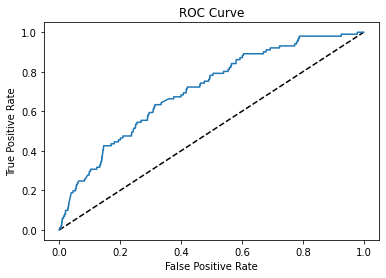

In [12]:
from sklearn.linear_model import LogisticRegression
log_reg_params={'logisticregression__penalty': ['l1','l2','elasticnet'], 
                'logisticregression__C':np.arange(0.5, 100.0, 0.5) }
avg= 'binary'
log_reg2 = LogisticRegression()
model_evaluation(log_reg2,log_reg_params,avg)

## LR Model 2

F1-score:  0.1491
Best Score:  0.6871
Test ROC AUC: 0.6971 

Best Parameters:  {'logisticregression__penalty': 'l2', 'logisticregression__class_weight': 'balanced', 'logisticregression__C': 2.0}
Confusion Matrix:  
 [[1107  731]
 [  34   67]] 

Classsification Report:  
               precision    recall  f1-score   support

           0       0.97      0.60      0.74      1838
           1       0.08      0.66      0.15       101

    accuracy                           0.61      1939
   macro avg       0.53      0.63      0.45      1939
weighted avg       0.92      0.61      0.71      1939



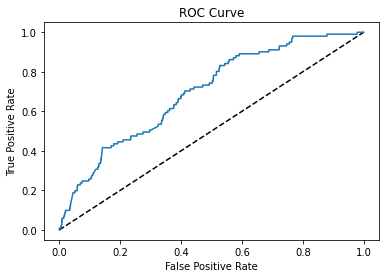

In [11]:
from sklearn.linear_model import LogisticRegression
log_reg_params={'logisticregression__penalty': ['l1','l2','elasticnet'], 'logisticregression__class_weight':['balanced'] , 
                'logisticregression__C':np.arange(0.5, 100.0, 0.5) }
avg= 'binary'
log_reg = LogisticRegression()
model_evaluation(log_reg,log_reg_params,avg)

# Random Forest

F1-score:  0.0
Best Score:  0.7986
Test ROC AUC: 0.8166 

Best Parameters:  {'randomforestclassifier__n_estimators': 2000, 'randomforestclassifier__min_samples_split': 3, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 8, 'randomforestclassifier__criterion': 'entropy'}
Confusion Matrix:  
 [[1835    3]
 [ 101    0]] 

Classsification Report:  
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1838
           1       0.00      0.00      0.00       101

    accuracy                           0.95      1939
   macro avg       0.47      0.50      0.49      1939
weighted avg       0.90      0.95      0.92      1939



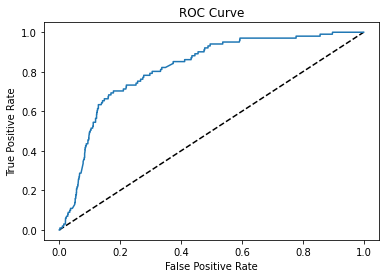

In [14]:
params= { 'randomforestclassifier__n_estimators': [500,600,800,1000,1500, 1800, 2000], 
             'randomforestclassifier__max_features': ['auto', 'sqrt', 'log2'], 
             'randomforestclassifier__max_depth' :  np.arange(4,20), 
             'randomforestclassifier__criterion' :['gini', 'entropy'],
            'randomforestclassifier__min_samples_split' : [2, 3, 4] }
avg= 'binary'

model_evaluation(RandomForestClassifier(), params, avg)

# Gradient Boosting

F1-score:  0.0185
Best Score:  0.7959
Test ROC AUC: 0.8282 

Best Parameters:  {'gradientboostingclassifier__n_estimators': 300, 'gradientboostingclassifier__max_features': 'sqrt', 'gradientboostingclassifier__max_depth': 5, 'gradientboostingclassifier__learning_rate': 0.05}
Confusion Matrix:  
 [[1832    6]
 [ 100    1]] 

Classsification Report:  
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1838
           1       0.14      0.01      0.02       101

    accuracy                           0.95      1939
   macro avg       0.55      0.50      0.50      1939
weighted avg       0.91      0.95      0.92      1939



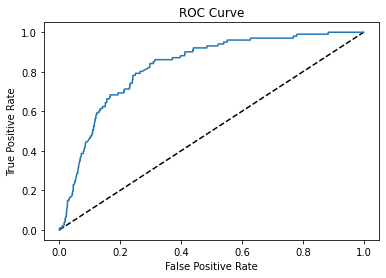

In [16]:
# Gradient Boosting

gb_params= {'gradientboostingclassifier__learning_rate': [0.05, 0.1, 0.25, 0.5, 0.75, 1], 
            'gradientboostingclassifier__n_estimators': [100,200,300,500],
            'gradientboostingclassifier__max_depth':np.arange(3,9),
          'gradientboostingclassifier__max_features': ['auto', 'sqrt', 'log2']}

avg= 'binary'
gb= GradientBoostingClassifier()

model_evaluation(GradientBoostingClassifier(), gb_params, avg)

# XGBoost

In [10]:
import xgboost as xgb
from xgboost import XGBClassifier

## XGBoost Model1 

C:\Users\laptop\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\laptop\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:40:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:40:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
F1-score:  0.0192
Best Score:  0.7966
Test ROC AUC: 0.8228 

Best Parameters:  {'xgbclassifier__subsample': 0.91, 'xgbclassifier__silent': 1, 'xgbclassifier__seed': 27, 'xgbclassifier__objective': 'binary:logistic', 'xgbclassifier__nthread': 10, 'xgbclassifier__n_estimators': 1000, 'xgbclassifier__min_chi

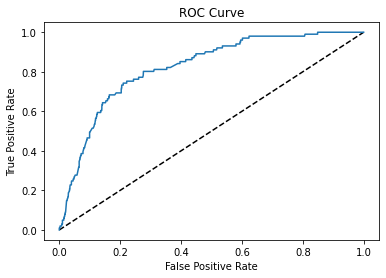

In [18]:
xg_params= {'xgbclassifier__nthread':[10], #when use hyperthread, xgboost may become slower
              'xgbclassifier__objective':['binary:logistic'],
              'xgbclassifier__learning_rate': [0.05], #so called `eta` value
              'xgbclassifier__max_depth': [2],
              'xgbclassifier__min_child_weight':[1] ,
              'xgbclassifier__silent': [1],
              'xgbclassifier__subsample': [.89,.91,.895],
              'xgbclassifier__colsample_bytree':[.58,.585],
              'xgbclassifier__n_estimators': [1000],
             'xgbclassifier__seed': [27]
            }            #number of trees, change it to 1000 for better results 
avg= 'binary'

xgb=XGBClassifier()

model_evaluation(XGBClassifier(), xg_params, avg)

## XGBoost Model 2 

In [19]:
from collections import Counter
counter=Counter(y)
estimate= counter[0]/counter[1]
print(estimate)
# 1, 10,18, 25, 50, 75, 99, 100

18.27037773359841


C:\Users\laptop\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:45:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:45:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
F1-score:  0.2466
Best Score:  0.7964
Test ROC AUC: 0.8249 

Best Parameters:  {'xgbclassifier__subsample': 0.5, 'xgbclassifier__silent': 1, 'xgbclassifier__seed': 27, 'xgbclassifier__scale_pos_weight': 18, 'xgbclassifier__objective': 'binary:logistic', 'xgbclassifier__nthread': 10, 'xgbclassifier__n_esti

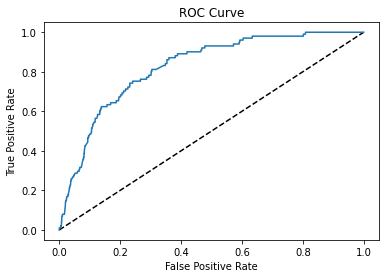

In [20]:
xg_params= { 'xgbclassifier__nthread':[10],
            'xgbclassifier__objective':['binary:logistic'],
              'xgbclassifier__learning_rate': np.arange(0.05,0.3), #so called `eta` value
              'xgbclassifier__max_depth': np.arange(2,10),
              'xgbclassifier__min_child_weight':np.arange(1,6),
              'xgbclassifier__silent': [1],
              'xgbclassifier__subsample':np.arange(0.5,0.9),
              'xgbclassifier__colsample_bytree': np.arange(0.5,0.9),
              'xgbclassifier__n_estimators': [1000,1500],
              'xgbclassifier__scale_pos_weight': [18],
              'xgbclassifier__seed': [27]
            }            #number of trees, change it to 1000 for better results 
avg= 'binary'

xgb=XGBClassifier()

model_evaluation(XGBClassifier(), xg_params, avg)

# Explaining Model with Shap Values

We get the best score with XGBOOST Model.

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[16:56:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:56:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
F1-score:  0.2466
ROC AUC: 0.8262 

Confusion Matrix:  
 [[1420  418]
 [  28   73]] 

Classsification Report:  
               precision    recall  f1-score   support

           0       0.98      0.77      0.86      1838
           1       0.15      0.72      0.25       101

    accuracy                 

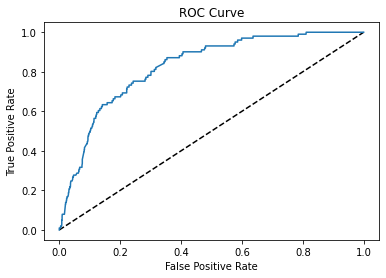

In [11]:
xgb= XGBClassifier(subsample=0.5, silent=1,seed=27,scale_pos_weight=18, nthread=10,n_estimators=1000, min_child_weight=1, 
             max_depth=2,learning_rate=0.05, colsample_bytree=0.5)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
y_pred_proba = xgb.predict_proba(X_test)[:,1]
f1 = f1_score(y_test, y_pred, average= 'binary')
cm = confusion_matrix(y_test, y_pred)
roc= roc_auc_score(y_test, y_pred_proba)
print('F1-score: ' , round(f1,4))
print("ROC AUC:", round(roc,4), '\n')
print("Confusion Matrix: " ,'\n', cm, '\n')
print("Classsification Report: ",'\n', classification_report(y_test, y_pred))
y_pred_proba=xgb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr,label= 'f"{model}" ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [12]:
feature_importance = xgb.feature_importances_
df= pd.DataFrame({'feature':X_train.columns,'importance':feature_importance}).sort_values('importance',ascending=False)
df_new=df.sort_values(by=['importance'], ascending=False)
df_new

,feature,importance
9,FG,0.138419
3,Species_CULEX PIPIENS,0.136164
2,Species_CULEX RESTUANS,0.128289
5,ResultSpeed_ema50,0.110709
1,Depart,0.109405
6,ResultDir_lag28,0.102766
4,PrecipTotal,0.095071
7,BR,0.077880
8,TS,0.057942
0,spray_day,0.043356


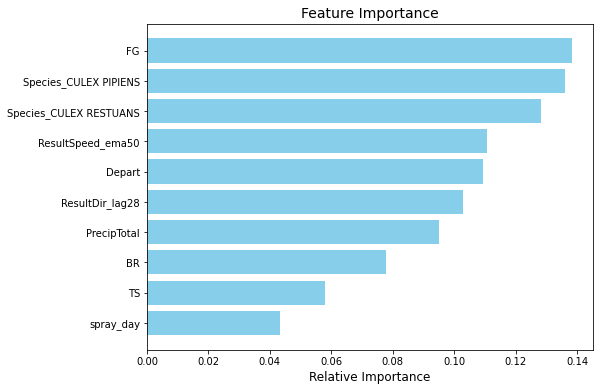

In [13]:
feature_importance = xgb.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0])
sorted_idx.size
plt.figure(figsize=(8,6))
plt.barh(pos, feature_importance[sorted_idx], align='center',color='skyblue')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance',fontsize=12)
plt.title('Feature Importance', fontsize=14)
plt.show()

In [14]:
import shap

In [15]:
explainer= shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_train)

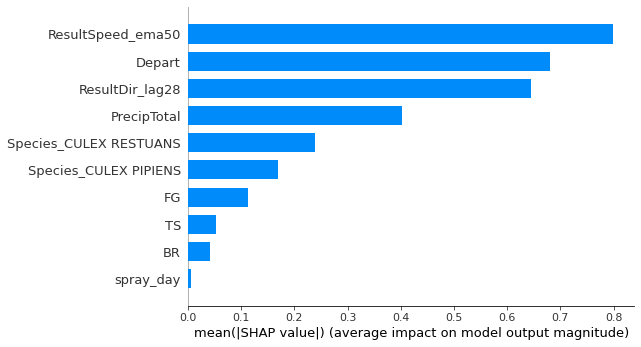

In [16]:
shap.summary_plot(shap_values, X_train,plot_type="bar")

## The Summary Plot

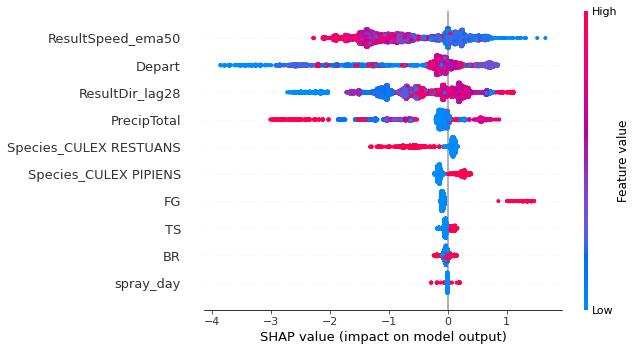

In [27]:
shap.summary_plot(shap_values, X_train)

In [17]:
shap.initjs()

In [18]:
base_value= explainer.expected_value
base_value

0.7661263

## The Dependence Plots

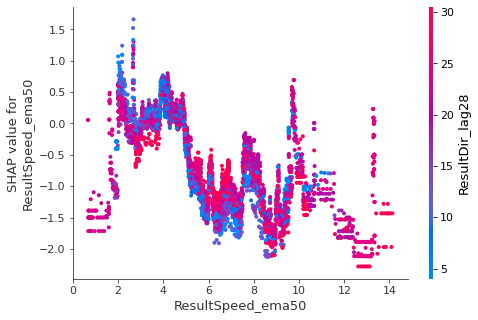

In [70]:
shap.dependence_plot("ResultSpeed_ema50", shap_values, X_train)

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


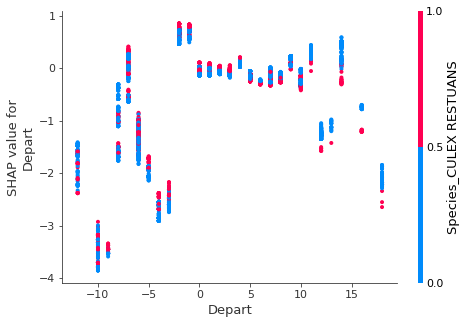

In [71]:
shap.dependence_plot("Depart", shap_values, X_train)

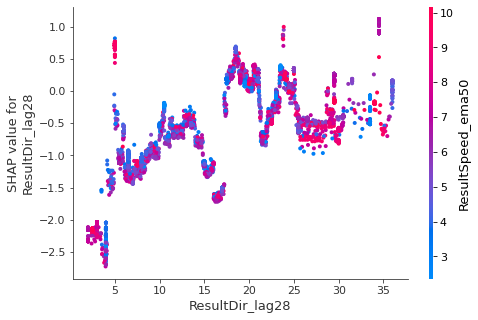

In [72]:
shap.dependence_plot("ResultDir_lag28", shap_values, X_train)

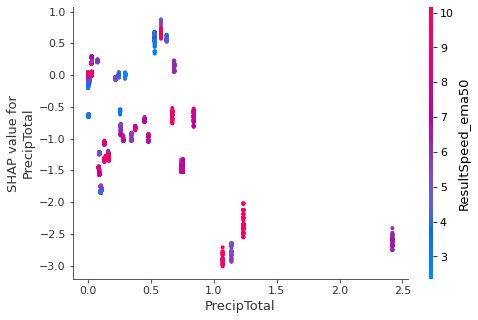

In [73]:
shap.dependence_plot("PrecipTotal", shap_values, X_train)

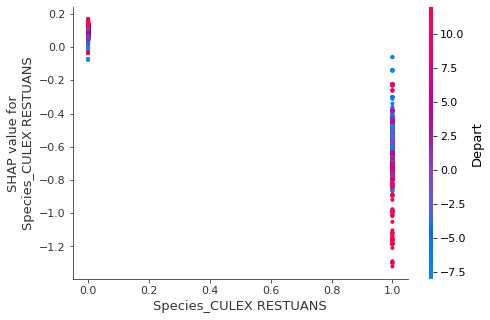

In [74]:
shap.dependence_plot("Species_CULEX RESTUANS", shap_values, X_train)

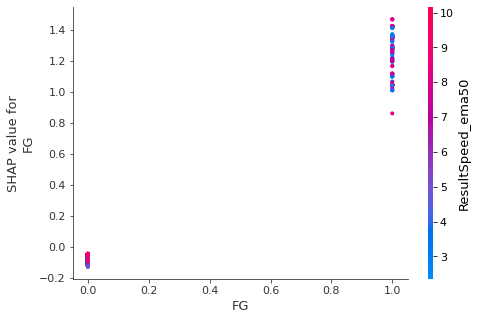

In [75]:
shap.dependence_plot("FG", shap_values, X_train)

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


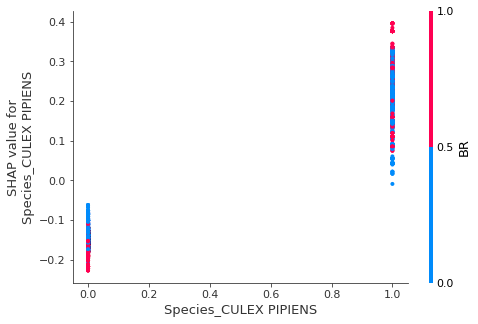

In [76]:
shap.dependence_plot("Species_CULEX PIPIENS", shap_values, X_train)

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


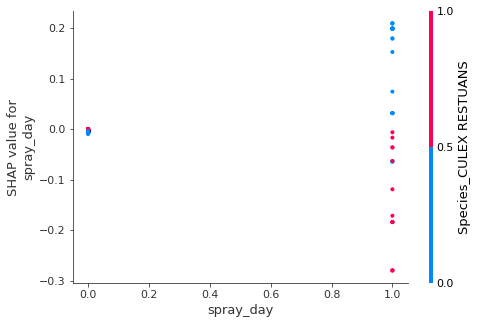

In [77]:
shap.dependence_plot("spray_day", shap_values, X_train)

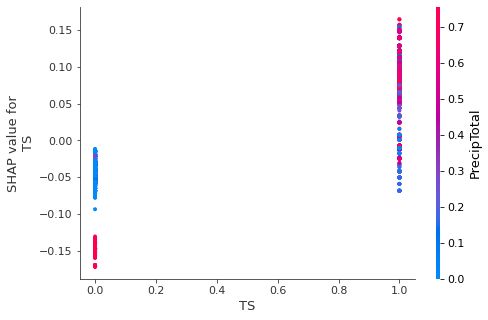

In [20]:
shap.dependence_plot("TS", shap_values, X_train)

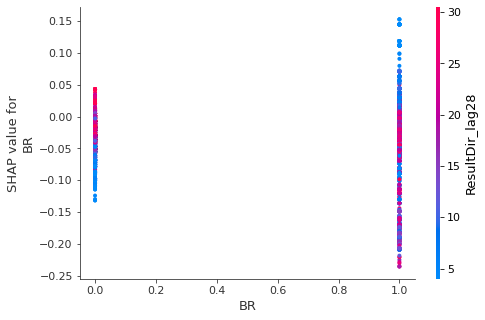

In [19]:
shap.dependence_plot("BR", shap_values, X_train)